In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(0)

Generate dataset with two informative features, 100 samples

In [2]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0)

Access first column, feature

In [3]:
X[:,0] # First feature for all samples
X[1,:] # All (2) features for the first sample

array([-0.92038325, -0.0723168 ])

Scale variables

In [4]:
X[:,0] = np.abs(X[:,0] * 0.5 + 5)
X[:,1] = np.abs(X[:,1] * 30 + 160)

Generate Plot

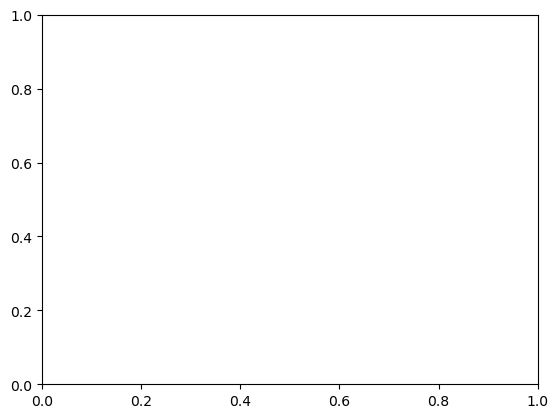

In [5]:
fig, ax = plt.subplots()

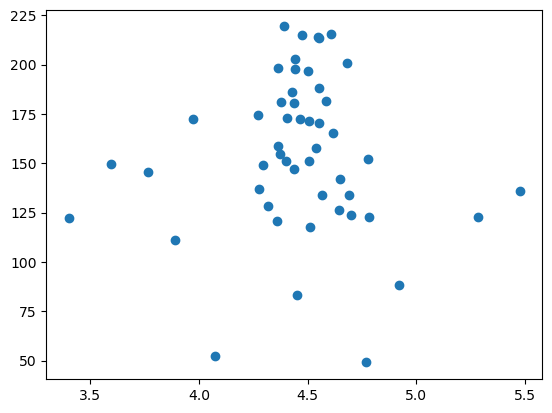

In [6]:
plt.show()
plt.scatter(X[y==0,0],X[y==0,1])

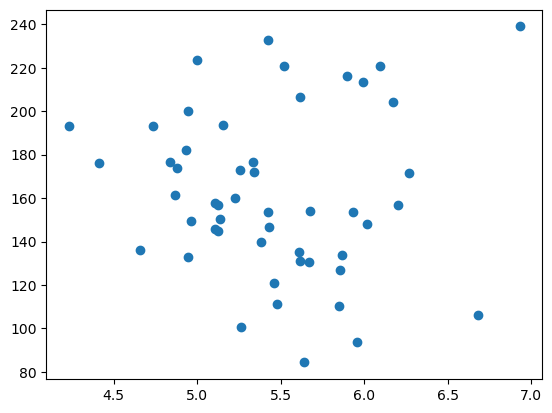

In [7]:
plt.scatter(X[y==1,0],X[y==1,1] )

Plot separation line

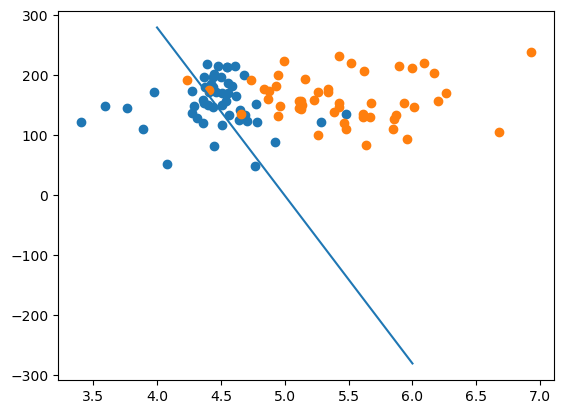

In [8]:
x1 = np.linspace(4,6,20)
x2 = 1400 - 280*x1
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1] )
plt.plot(x1,x2)
plt.show()

### Generating Covariance matrix 

- Generate arbitrary covariance matrix with a rotation

In [9]:
def get_cov(sdx=1, sdy=1, rotangdeg=0):
    covar = np.array([[sdx**2,0],[0,sdy**2]]) # Scaling factors
    rot_ang = rotangdeg / 360 * 2 * np.pi # Convert degree to radians
    c, s = np.cos(rot_ang), np.sin(rot_ang)
    rot_mat = np.array([[c, -s], [s, c]])
    #
    print(rot_mat)
    
    covar = np.matmul(np.matmul(rot_mat,covar),rot_mat.T) 
    return covar

Define grid to calculate this distribution
Generate meshgrid so we calculate function in 200*200=40000 points

In [10]:
x1line = np.linspace(-1,1,200)
x2line = np.linspace(-1,1,200)
x1grid,x2grid = np.meshgrid(x1line,x2line)

Combine these to a single array and reshape to (2,40000)

In [11]:
Xgrid = np.array([x1grid,x2grid]).reshape([2,40000]).T

#### Put above into a single function - Useful later

In [13]:
def gen_sample_grid(npx=200,npy=200,limit =1):
    x1line = np.linspace(-limit,limit,npx)
    x2line = np.linspace(-limit,limit,npx)
    x1grid,x2grid = np.meshgrid(x1line,x2line)
    Xgrid = np.array([x1grid,x2grid]).reshape([2,40000]).T
    return Xgrid,x1line,x2line

Produce covariance matrix of std 1 in x, 0.3 in y, and rotated 30degrees

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


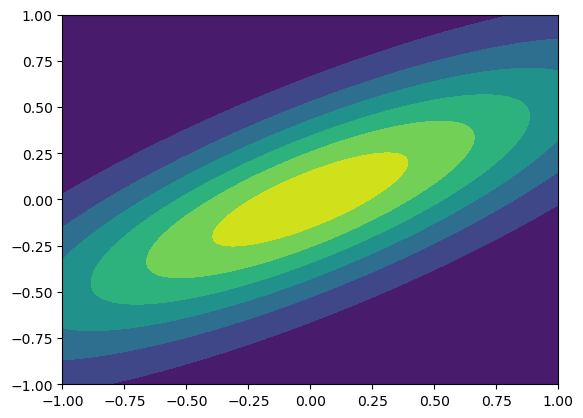

In [16]:
covar = get_cov(1,0.3,30)

p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(
    -1/2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid ).sum(-1))

p = p.reshape(200,200)
plt.contourf(x1line,x2line,p)

(-1.0, 1.0)

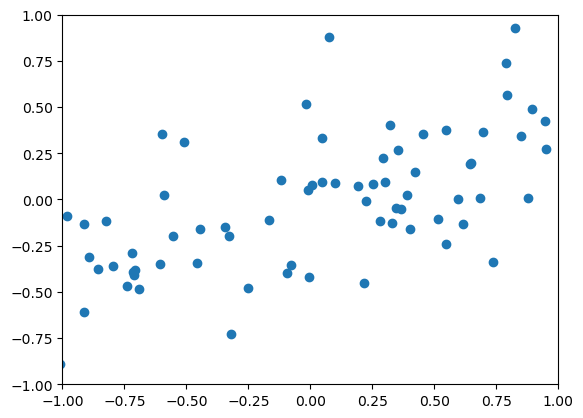

In [17]:
mean = [0, 0]
size = 100

x = np.random.multivariate_normal(mean,covar,size)
plt.scatter(x[:,0],x[:,1])
plt.xlim(-1,1)
plt.ylim(-1,1)

#### Generating a circular distribution

- Generate a dataset consisting of two classes,lying within a ring
- Class one will be both inside the ring and outside it
- Defined in polar coordinates as unifrom around angle theta and three normal dists in the radius, two combined for class one



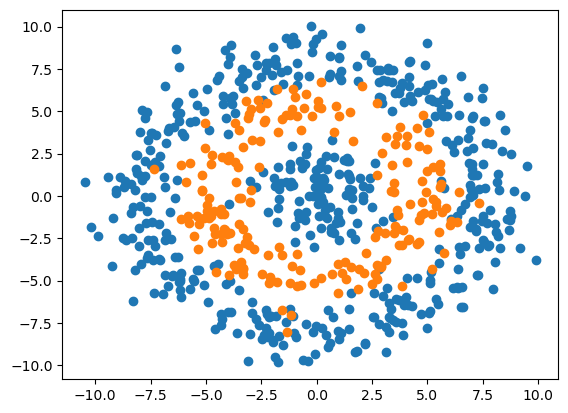

In [18]:
def gen_circular_distribution(n=700, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y



X, y = gen_circular_distribution(n=700, scale=1)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

plt.show()
